### Random Forest Classifier:
- It is a method that combines the predictions of multiple decision tasks to produce a more accurate and stable result.
- It can be used for both classification and regression tasks.
- In Classification, Random Forest Classification predicts categorical outcomes based on the input data.
- It uses multiple trees and outputs the label that has the maximum votes among all the individual tree predictions.

### Working of Random Forest Classifier:
#### 1. Bootstrap Sampling:
- Random rows picked(with replacement) to train each tree.
#### 2. Random Feature Selection:
- Each tree uses a random set of features (not all features).
#### 3. Build Decision Trees:
- Trees split the data using the best feature from their random set.
- Splitting continues until a stopping rule is met (like max depth).
#### 4. Make Predictions:
- Each tree gives its own prediction.
#### 5. Majority Voting:
- The final prediction is the one most tree agree on.

### Implementing Random Forest Classification in Python:
- Before implementing random forest classifier in Python lets first inderstand it's parameters -
    1. n_estimators - No of trees in the forest.
    2. n_depth - Max depth of each tree.
    3. max_features - No of features considered for splitting at each node.
    4. criterion - Function used to measure split quality ('gini (or) 'entropy').
    5. min_samples_split - Minimum samples required to split a node.
    6. min_samples_leaf - Minimum samples required to be at a leaf node.
    7. bootstrap - Wheather to use bootstrap sampling when building trees (True (or) False).
#### 1. Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#### 2. Import Dataset:
- We can use Iris Dataset which is available within scikit learn.
- This dataset contains information about three types of Iris flowers.
- Their respected Features are (sepal length, sepal width, petal length, petal width).

In [2]:
iris = load_iris()
Data = iris.data
FeatureNames = iris.feature_names
df = pd.DataFrame(Data, columns=FeatureNames)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 3. Data Preparation:
- Here we will separate the features(X) and the target variable (y).

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### 4. Splitting the Dataset:
- We'll split the dataset into training and testing sets so we can train the model on one part and evaluate it on another.
  1. X_train, y_train - 80% of the data used to train the model.
  2. X_test, y_test - 20% of the data used to test the model.
  3. test_size=0.2 - means 20% of data goes to testing.
  4. random_state=42 - To ensures you get same split at every time.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 5. Feature Scaling:
- It ensures that all the features are on a similar scale which is important for some machine learning models.
- However Random Forest is not highly sensitive to feature scaling. But it is a good pratice to scale when combining models.

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 6. Building Random Forest Classifier:
- We will create the Random Forest Classifier model, train it on the training data and make predictions on the test data. -
  1. RandomForestClassifier(n_estimators=100, random_state=42) - creates 100 trees (100 trees balance accuracy and training time).
  2. classifier.fit(X_train, y_train) - trains on training data.
  3. classifier.predict(X_test) -  predicts on test data
  4. random_state=42 - ensures reproducible results.

In [7]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### 7. Evaluation of the Model:
- We will evaluate the model using the accuracy score and confusion matrix.

Accuracy: 100.00%


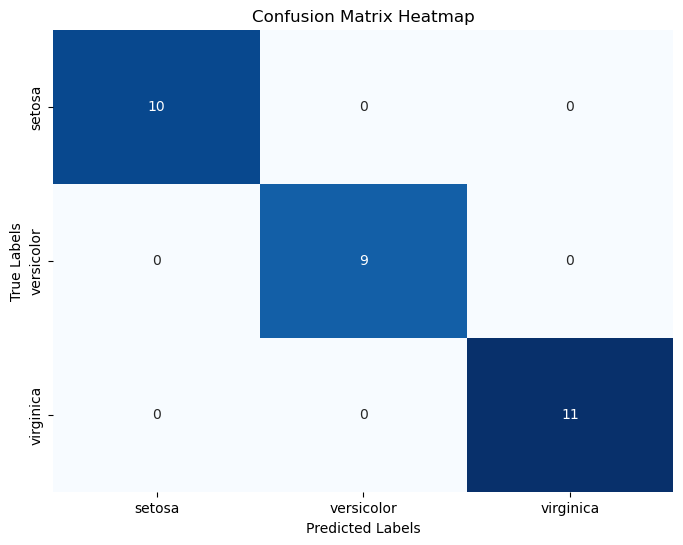

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 8. Feature Importance:
- Random Forest Classifiers also provide insight into which features were the most important in making predictions. We can plot the feature importance.

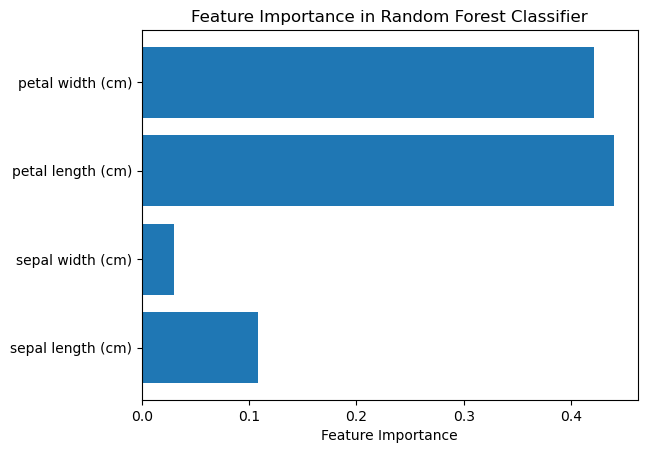

In [9]:
feature_importances = classifier.feature_importances_

plt.barh(iris.feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()